<a href="https://colab.research.google.com/github/Hazhar-Rahmani/Business-Analytics2/blob/main/W25_I01_Information_based_learning_Hazhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Import Data and Python Packages
import pandas as pd
import numpy as np
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image

In [41]:
!wget https://raw.githubusercontent.com/Hazhar-Rahmani/Business-Analytics2/refs/heads/main/crx.data

data = pd.read_csv('crx.data', header='infer')

# data (as pandas dataframes)
print(data)
x = data[data.columns[0:14]]
y = data[[data.columns[15]]]

--2025-02-02 03:14:51--  https://raw.githubusercontent.com/Hazhar-Rahmani/Business-Analytics2/refs/heads/main/crx.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32273 (32K) [text/plain]
Saving to: ‘crx.data.4’

crx.data.4          100%[===================>]  31.52K  --.-KB/s    in 0.01s   

2025-02-02 03:14:51 (2.97 MB/s) - ‘crx.data.4’ saved [32273/32273]

     b  30.83       0  u  g   w   v  1.25  t t.1  01  f g.1  00202  0.1  +
0    a  58.67   4.460  u  g   q   h  3.04  t   t   6  f   g  00043  560  +
1    a  24.50   0.500  u  g   q   h  1.50  t   f   0  f   g  00280  824  +
2    b  27.83   1.540  u  g   w   v  3.75  t   t   5  t   g  00100    3  +
3    b  20.17   5.625  u  g   w   v  1.71  t   f   0  f   s  00120    0  +
4    b  32.08   4.000  u  g

In [42]:
nan_index = x.isna().any(axis=1)
x = x[~nan_index]
y = y[~nan_index]

In [43]:
print(x)
print(type(x))
print(y)
print(type(y))

     b  30.83       0  u  g   w   v  1.25  t t.1  01  f g.1  00202
0    a  58.67   4.460  u  g   q   h  3.04  t   t   6  f   g  00043
1    a  24.50   0.500  u  g   q   h  1.50  t   f   0  f   g  00280
2    b  27.83   1.540  u  g   w   v  3.75  t   t   5  t   g  00100
3    b  20.17   5.625  u  g   w   v  1.71  t   f   0  f   s  00120
4    b  32.08   4.000  u  g   m   v  2.50  t   f   0  t   g  00360
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  .. ..  ..    ...
684  b  21.08  10.085  y  p   e   h  1.25  f   f   0  f   g  00260
685  a  22.67   0.750  u  g   c   v  2.00  f   t   2  t   g  00200
686  a  25.25  13.500  y  p  ff  ff  2.00  f   t   1  t   g  00200
687  b  17.92   0.205  u  g  aa   v  0.04  f   f   0  f   g  00280
688  b  35.00   3.375  u  g   c   h  8.29  f   f   0  t   g  00000

[689 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
     +
0    +
1    +
2    +
3    +
4    +
..  ..
684  -
685  -
686  -
687  -
688  -

[689 rows x 1 columns]
<class 'pandas.core.frame

In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in x.columns:
    if x[column].dtype == 'object':
        le = LabelEncoder()
        x[column] = le.fit_transform(x[column])
        label_encoders[column] = le

for column in y.columns:
    if y[column].dtype == 'object':
        le = LabelEncoder()
        y[column] = le.fit_transform(y[column])
        label_encoders[column] = le


In [45]:
print(x)

     b  30.83       0  u  g   w  v  1.25  t  t.1  01  f  g.1  00202
0    1    327   4.460  2  1  11  4  3.04  1    1   6  0    0     11
1    1     89   0.500  2  1  11  4  1.50  1    0   0  0    0     95
2    2    125   1.540  2  1  13  8  3.75  1    1   5  1    0     31
3    2     43   5.625  2  1  13  8  1.71  1    0   0  0    2     37
4    2    167   4.000  2  1  10  8  2.50  1    0   0  1    0    114
..  ..    ...     ... .. ..  .. ..   ... ..  ...  .. ..  ...    ...
684  2     52  10.085  3  3   5  4  1.25  0    0   0  0    0     89
685  1     71   0.750  2  1   2  8  2.00  0    1   2  1    0     67
686  1     97  13.500  3  3   6  3  2.00  0    1   1  1    0     67
687  2     20   0.205  2  1   1  8  0.04  0    0   0  0    0     95
688  2    196   3.375  2  1   2  4  8.29  0    0   0  1    0      0

[689 rows x 14 columns]


In [46]:
print(y)

     +
0    0
1    0
2    0
3    0
4    0
..  ..
684  1
685  1
686  1
687  1
688  1

[689 rows x 1 columns]


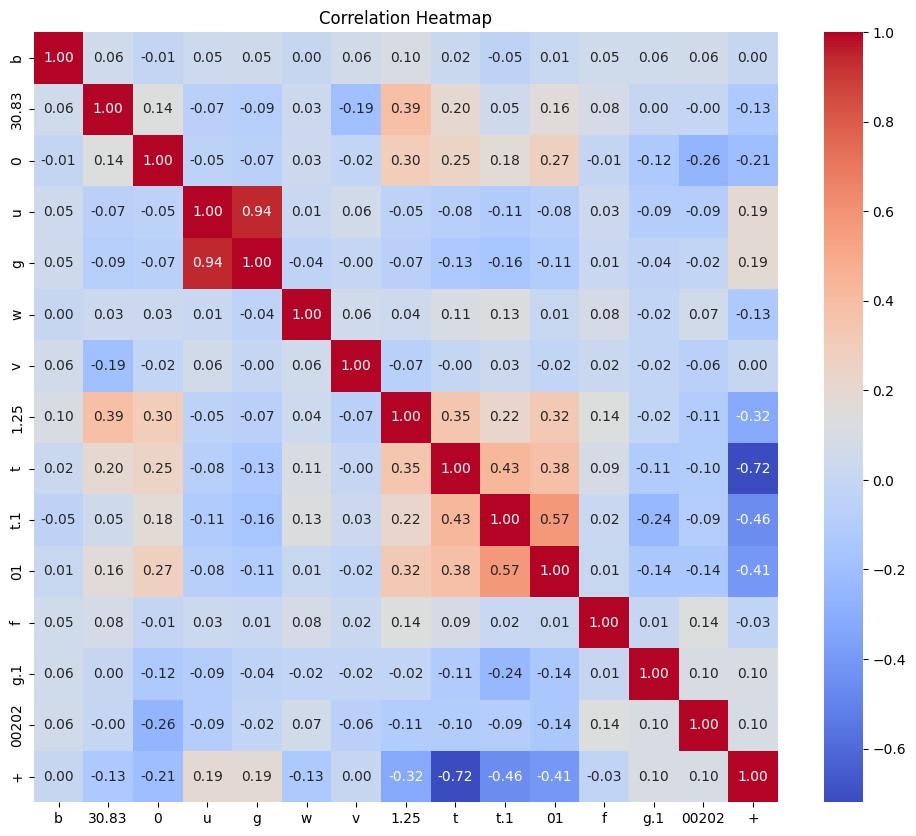

In [47]:
temp_df = pd.concat([x, y], axis=1)
corrolation = temp_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corrolation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [48]:
rs = 45
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=rs)

In [49]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=rs)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=45)

In [50]:
print("Model Entropy")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "approved"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "denied"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for "approved"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "denied"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy
Accuracy: 0.8405797101449275
Balanced accuracy: 0.8314940577249575
Precision score for "approved" 0.813953488372093
Precision score for "denied" 0.8846153846153846
Recall score for "approved" 0.9210526315789473
Recall score for "denied" 0.7419354838709677


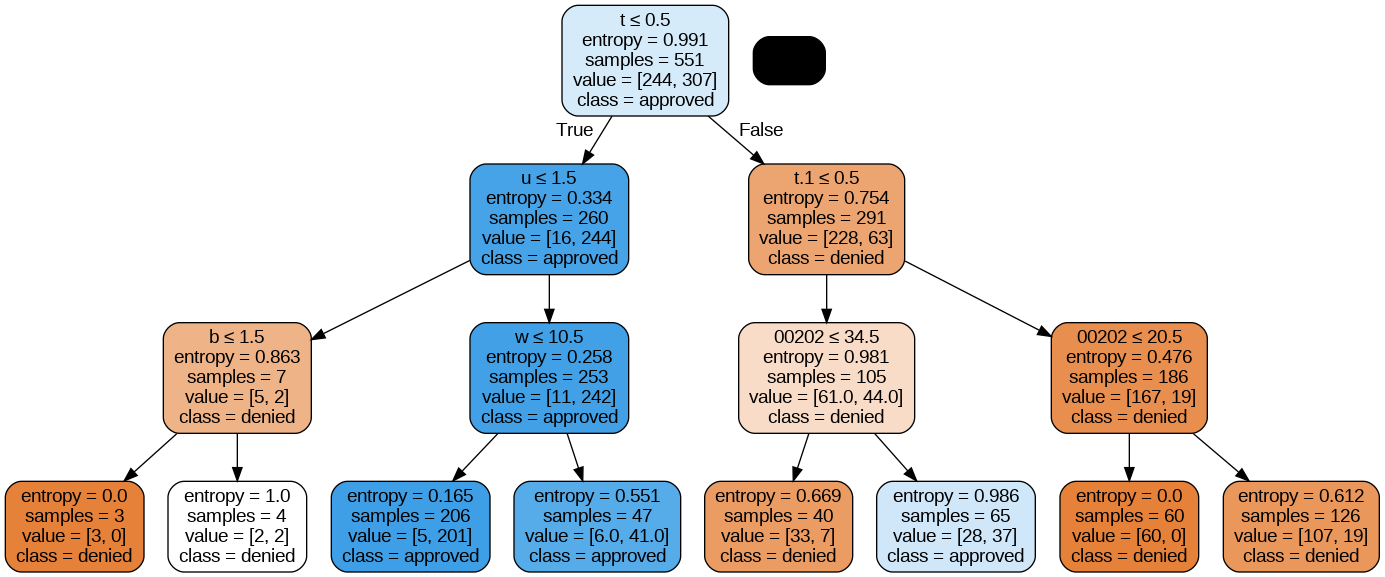

In [51]:
dot_data=StringIO()
tree.export_graphviz(entr_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,
                class_names = ["denied", "approved"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [52]:
entr_model = tree.DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=rs)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(max_depth=3, random_state=45)

In [53]:
print("Model Entropy")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "approved"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "denied"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for "approved"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "denied"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy
Accuracy: 0.8405797101449275
Balanced accuracy: 0.8314940577249575
Precision score for "approved" 0.813953488372093
Precision score for "denied" 0.8846153846153846
Recall score for "approved" 0.9210526315789473
Recall score for "denied" 0.7419354838709677


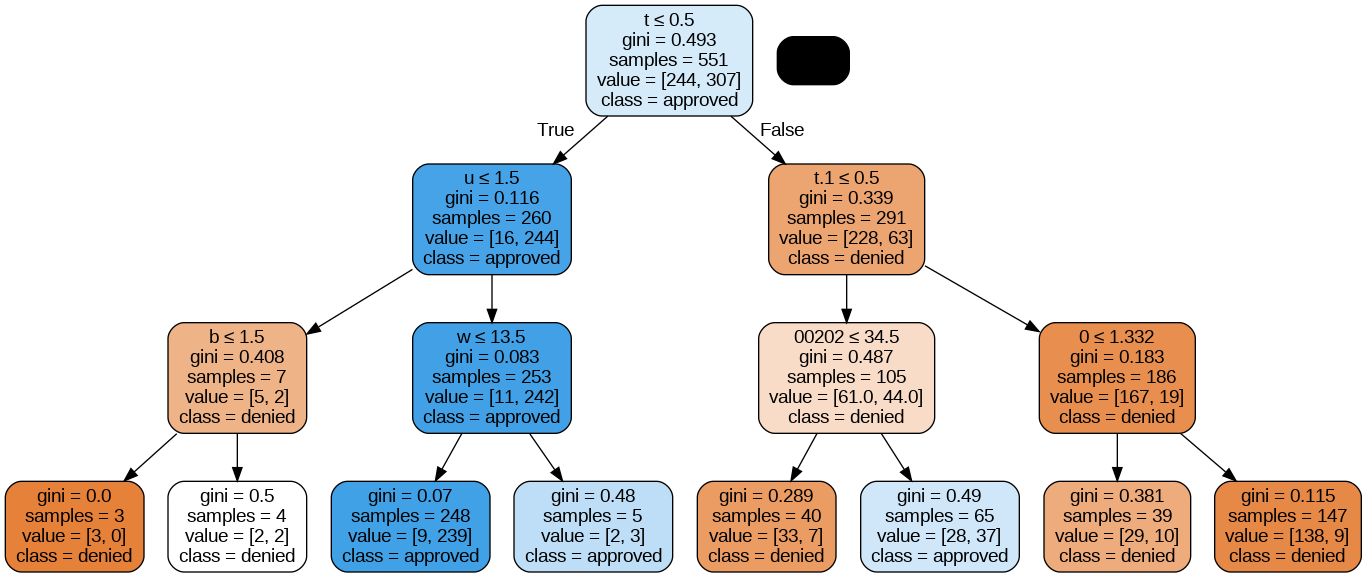

In [54]:
dot_data=StringIO()
tree.export_graphviz(entr_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,
                class_names = ["denied", "approved"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())